## Airline Passenger Satisfaction

In [2]:
"""Import the necessary libraries for the project."""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1️⃣ **Loading the data**

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
print(f"The train data has {train_df.shape[0]} rows and {train_df.shape[1]} columns.")
print(f"The test data has {test_df.shape[0]} rows and {test_df.shape[1]} columns.")

The train data has 103904 rows and 25 columns.
The test data has 25976 rows and 25 columns.


In [5]:
print("The first five rows of the train data are:")
train_df.head()

The first five rows of the train data are:


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
print("The information of the train data is:")
train_df.info()

The information of the train data is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  G

2️⃣ **Data Cleaning and Preprocessing**

In [7]:
# unique values in each column
for column in train_df.columns:
    print(f"{column}: {train_df[column].unique()}")

Unnamed: 0: [     0      1      2 ... 103901 103902 103903]
id: [ 70172   5047 110028 ...  68825  54173  62567]
Gender: ['Male' 'Female']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Age: [13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
Type of Travel: ['Personal Travel' 'Business travel']
Class: ['Eco Plus' 'Business' 'Eco']
Flight Distance: [ 460  235 1142 ...  974 1479  400]
Inflight wifi service: [3 2 4 1 5 0]
Departure/Arrival time convenient: [4 2 5 3 1 0]
Ease of Online booking: [3 2 5 4 1 0]
Gate location: [1 3 2 5 4 0]
Food and drink: [5 1 2 4 3 0]
Online boarding: [3 5 2 1 4 0]
Seat comfort: [5 1 2 3 4 0]
Inflight entertainment: [5 1 2 3 4 0]
On-board service: [4 1 2 3 5 0]
Leg room service: [3 5 4 2 1 0]
Baggage handling: [4 3 5 1 2]
Checkin service: [4 1 3 5 2 0]
Inflight service: [5 4 3

**Add Some Noise to the Data to Make it More Realistic**

In [8]:
# create a copy of the training dataset
train_df_copy = train_df.copy()
# add some null and nan values to the dataset for demonstration
selected_ids = np.random.choice(train_df_copy.index, 100, replace=False)
selected_ids = [
    selected_ids[:20],
    selected_ids[20:40],
    selected_ids[40:60],
    selected_ids[60:80],
    selected_ids[80:],
]
train_df_copy.loc[selected_ids[0], "Departure Delay in Minutes"] = np.nan
train_df_copy.loc[selected_ids[0], "Type of Travel"] = "Unknown"
train_df_copy.loc[selected_ids[0], "Gender"] = ""
train_df_copy.loc[selected_ids[0], "Seat comfort"] = np.nan
train_df_copy.loc[selected_ids[0], "Age"] = np.nan

In [9]:
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103884 non-null  float64
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [10]:
train_df = train_df_copy

In [11]:
# Drop rows if multiple columns have missing values
# train_df.dropna(subset=["Departure Delay in Minutes", "Seat comfort"], how="all", inplace=True)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103884 non-null  float64
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [12]:
# see the unique values in each column again
for column in train_df.columns:
    print(f"{column}: {train_df[column].unique()}")

Unnamed: 0: [     0      1      2 ... 103901 103902 103903]
id: [ 70172   5047 110028 ...  68825  54173  62567]
Gender: ['Male' 'Female' '']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Age: [13. 25. 26. 61. 47. 52. 41. 20. 24. 12. 53. 33. 45. 38.  9. 17. 43. 58.
 23. 57. 49. 36. 22. 31. 15. 35. 67. 37. 40. 34. 39. 50. 29. 54. 21. 28.
 27. 69. 60. 48. 59. 46. 30. 66. 64. 44. 51. 32. 19. 42. 16. 11. 62.  8.
 56. 68. 55. 18. 65. 72. 70. 63. 10.  7. 14. 80. 74. 71. 85. 73. 76. 77.
 75. 79. nan 78.]
Type of Travel: ['Personal Travel' 'Business travel' 'Unknown']
Class: ['Eco Plus' 'Business' 'Eco']
Flight Distance: [ 460  235 1142 ...  974 1479  400]
Inflight wifi service: [3 2 4 1 5 0]
Departure/Arrival time convenient: [4 2 5 3 1 0]
Ease of Online booking: [3 2 5 4 1 0]
Gate location: [1 3 2 5 4 0]
Food and drink: [5 1 2 4 3 0]
Online boarding: [3 5 2 1 4 0]
Seat comfort: [ 5.  1.  2.  3.  4. nan  0.]
Inflight entertainment: [5 1 2 3 4 0]
On-board service: [4 1 2 3 5 0]
Leg room

In [13]:
# fill the missing values in gender column with the mode
# count the values for each unique value in gender
train_df["Gender"].value_counts()

Gender
Female    52719
Male      51165
             20
Name: count, dtype: int64

In [14]:
print(f"The mode of the gender column is {train_df['Gender'].mode()[0]}")

The mode of the gender column is Female


In [15]:
# make gender column Female if it is empty
# train_df[train_df["Gender"] == ""]["Gender"] = "Female"
train_df.loc[train_df["Gender"] == "", "Gender"] = "Female"

In [16]:
train_df["Gender"].value_counts()

Gender
Female    52739
Male      51165
Name: count, dtype: int64

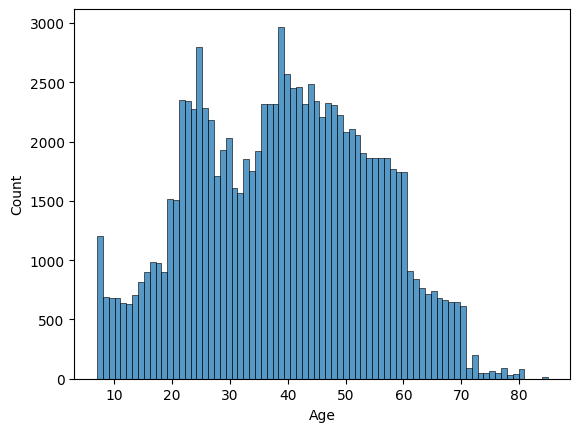

In [17]:
# plot the age distribution to decide how to fill the missing values
sns.histplot(train_df["Age"])
plt.show()


In [18]:
# calculate the mean, median, mode, and skewness of the age column
age_mean = train_df["Age"].mean()
age_median = train_df["Age"].median()
age_mode = train_df["Age"].mode()[0]
age_skew = train_df["Age"].skew()
print(f"Mean: {age_mean}")
print(f"Median: {age_median}")
print(f"Mode: {age_mode}")
print(f"Skewness: {age_skew}")

Mean: 39.37924993261715
Median: 40.0
Mode: 39.0
Skewness: -0.004514023871770579


In [19]:
# fill the missing values in the age column with the median
train_df["Age"].fillna(age_median, inplace=True)

/var/folders/0l/jh7543nx7fd7c813pmj1dz4h0000gn/T/ipykernel_10252/1375470561.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Age"].fillna(age_median, inplace=True)


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  float64
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [21]:
# see the unique in Type of Travel column
train_df["Type of Travel"].unique()

array(['Personal Travel', 'Business travel', 'Unknown'], dtype=object)

In [22]:
# fill the missing values in the Type of Travel column with the mode
train_df["Type of Travel"].value_counts()

Type of Travel
Business travel    71641
Personal Travel    32243
Unknown               20
Name: count, dtype: int64

In [23]:
# change "Unknown" to "Business travel"
train_df["Type of Travel"].replace("Unknown", "Business travel", inplace=True)

/var/folders/0l/jh7543nx7fd7c813pmj1dz4h0000gn/T/ipykernel_10252/2025621380.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Type of Travel"].replace("Unknown", "Business travel", inplace=True)


In [24]:
train_df["Type of Travel"].value_counts()

Type of Travel
Business travel    71661
Personal Travel    32243
Name: count, dtype: int64

In [25]:
# see the unique in Seat comfort column
train_df["Seat comfort"].unique()

array([ 5.,  1.,  2.,  3.,  4., nan,  0.])

In [26]:
# fill the missing values in the Seat comfort column with the mode
train_df["Seat comfort"].value_counts()

Seat comfort
4.0    31758
5.0    26465
3.0    18692
2.0    14895
1.0    12073
0.0        1
Name: count, dtype: int64

In [27]:
# fill nan values with the mode
train_df["Seat comfort"].fillna(train_df["Seat comfort"].mode()[0], inplace=True)

/var/folders/0l/jh7543nx7fd7c813pmj1dz4h0000gn/T/ipykernel_10252/2731870688.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Seat comfort"].fillna(train_df["Seat comfort"].mode()[0], inplace=True)


In [28]:
train_df["Seat comfort"].value_counts()

Seat comfort
4.0    31778
5.0    26465
3.0    18692
2.0    14895
1.0    12073
0.0        1
Name: count, dtype: int64

In [29]:
# see the unique values in each column again
for column in train_df.columns:
    print(f"{column}: {train_df[column].unique()}")

Unnamed: 0: [     0      1      2 ... 103901 103902 103903]
id: [ 70172   5047 110028 ...  68825  54173  62567]
Gender: ['Male' 'Female']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Age: [13. 25. 26. 61. 47. 52. 41. 20. 24. 12. 53. 33. 45. 38.  9. 17. 43. 58.
 23. 57. 49. 36. 22. 31. 15. 35. 67. 37. 40. 34. 39. 50. 29. 54. 21. 28.
 27. 69. 60. 48. 59. 46. 30. 66. 64. 44. 51. 32. 19. 42. 16. 11. 62.  8.
 56. 68. 55. 18. 65. 72. 70. 63. 10.  7. 14. 80. 74. 71. 85. 73. 76. 77.
 75. 79. 78.]
Type of Travel: ['Personal Travel' 'Business travel']
Class: ['Eco Plus' 'Business' 'Eco']
Flight Distance: [ 460  235 1142 ...  974 1479  400]
Inflight wifi service: [3 2 4 1 5 0]
Departure/Arrival time convenient: [4 2 5 3 1 0]
Ease of Online booking: [3 2 5 4 1 0]
Gate location: [1 3 2 5 4 0]
Food and drink: [5 1 2 4 3 0]
Online boarding: [3 5 2 1 4 0]
Seat comfort: [5. 1. 2. 3. 4. 0.]
Inflight entertainment: [5 1 2 3 4 0]
On-board service: [4 1 2 3 5 0]
Leg room service: [3 5 4 2 1 0]
Bag

In [30]:
train_df.shape

(103904, 25)

In [31]:
# drop rows with missing values
train_df.dropna(inplace=True)

In [32]:
train_df.shape

(103574, 25)

In [33]:
# drop duplicates
train_df.drop_duplicates(inplace=True)

In [34]:
train_df.shape

(103574, 25)

In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103574 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103574 non-null  int64  
 1   id                                 103574 non-null  int64  
 2   Gender                             103574 non-null  object 
 3   Customer Type                      103574 non-null  object 
 4   Age                                103574 non-null  float64
 5   Type of Travel                     103574 non-null  object 
 6   Class                              103574 non-null  object 
 7   Flight Distance                    103574 non-null  int64  
 8   Inflight wifi service              103574 non-null  int64  
 9   Departure/Arrival time convenient  103574 non-null  int64  
 10  Ease of Online booking             103574 non-null  int64  
 11  Gate location                      103574 no

In [36]:
# drop unnecessary columns
train_df.drop(columns=["Unnamed: 0"], inplace=True)
train_df.drop(columns=["id"], inplace=True)

In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103574 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103574 non-null  object 
 1   Customer Type                      103574 non-null  object 
 2   Age                                103574 non-null  float64
 3   Type of Travel                     103574 non-null  object 
 4   Class                              103574 non-null  object 
 5   Flight Distance                    103574 non-null  int64  
 6   Inflight wifi service              103574 non-null  int64  
 7   Departure/Arrival time convenient  103574 non-null  int64  
 8   Ease of Online booking             103574 non-null  int64  
 9   Gate location                      103574 non-null  int64  
 10  Food and drink                     103574 non-null  int64  
 11  Online boarding                    103574 no

In [38]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [39]:
# drop unnecessary columns
test_df.drop(columns=["Unnamed: 0"], inplace=True)
test_df.drop(columns=["id"], inplace=True)

In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [41]:
# see the unique values in each column again for the test dataset
for column in test_df.columns:
    print(f"{column}: {test_df[column].unique()}")

Gender: ['Female' 'Male']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Age: [52 36 20 44 49 16 77 43 47 46 33 60 50 31 55 25 30 62 24 22 51 56 41 53
 12 39 32 40 42 28 59 58 27 67 70 66 19 69 35 54 26 61 21 37 45 38  7 34
 17 15 48 13 11 29  8 18 23 65 57 80 64  9 14 68 10 79 63 73 74 71 72 76
 78 75 85]
Type of Travel: ['Business travel' 'Personal Travel']
Class: ['Eco' 'Business' 'Eco Plus']
Flight Distance: [ 160 2863  192 ... 3714 3097 3518]
Inflight wifi service: [5 1 2 0 3 4]
Departure/Arrival time convenient: [4 1 0 3 5 2]
Ease of Online booking: [3 2 0 4 5 1]
Gate location: [4 1 2 3 5]
Food and drink: [3 5 2 4 1 0]
Online boarding: [4 2 1 5 3 0]
Seat comfort: [3 5 2 4 1]
Inflight entertainment: [5 4 2 1 3 0]
On-board service: [5 4 1 2 3 0]
Leg room service: [5 4 1 2 3 0]
Baggage handling: [5 4 3 1 2]
Checkin service: [2 3 4 1 5]
Inflight service: [5 4 2 1 3 0]
Cleanliness: [5 2 4 3 1 0]
Departure Delay in Minutes: [  50    0   77    1   28   29   18  117   10    5    2

In [42]:
# drop rows with missing values
test_df.dropna(inplace=True)

In [43]:
test_df.shape

(25893, 23)

In [44]:
# drop duplicates
test_df.drop_duplicates(inplace=True)

In [45]:
test_df.shape

(25893, 23)

In [46]:
# save the cleaned datasets
train_df.to_csv("train_cleaned.csv", index=False)
test_df.to_csv("test_cleaned.csv", index=False)

3️⃣ **Exploratory Data Analysis**

In [53]:
# load the cleaned datasets
train_df = pd.read_csv("train_cleaned.csv")
test_df = pd.read_csv("test_cleaned.csv")

In [54]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103574 entries, 0 to 103573
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103574 non-null  object 
 1   Customer Type                      103574 non-null  object 
 2   Age                                103574 non-null  float64
 3   Type of Travel                     103574 non-null  object 
 4   Class                              103574 non-null  object 
 5   Flight Distance                    103574 non-null  int64  
 6   Inflight wifi service              103574 non-null  int64  
 7   Departure/Arrival time convenient  103574 non-null  int64  
 8   Ease of Online booking             103574 non-null  int64  
 9   Gate location                      103574 non-null  int64  
 10  Food and drink                     103574 non-null  int64  
 11  Online boarding                    1035

In [55]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25893 entries, 0 to 25892
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25893 non-null  object 
 1   Customer Type                      25893 non-null  object 
 2   Age                                25893 non-null  int64  
 3   Type of Travel                     25893 non-null  object 
 4   Class                              25893 non-null  object 
 5   Flight Distance                    25893 non-null  int64  
 6   Inflight wifi service              25893 non-null  int64  
 7   Departure/Arrival time convenient  25893 non-null  int64  
 8   Ease of Online booking             25893 non-null  int64  
 9   Gate location                      25893 non-null  int64  
 10  Food and drink                     25893 non-null  int64  
 11  Online boarding                    25893 non-null  int

In [56]:
# fix the column names
train_df.columns = train_df.columns.str.lower().str.replace(" ", "_")
test_df.columns = test_df.columns.str.lower().str.replace(" ", "_")

In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103574 entries, 0 to 103573
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             103574 non-null  object 
 1   customer_type                      103574 non-null  object 
 2   age                                103574 non-null  float64
 3   type_of_travel                     103574 non-null  object 
 4   class                              103574 non-null  object 
 5   flight_distance                    103574 non-null  int64  
 6   inflight_wifi_service              103574 non-null  int64  
 7   departure/arrival_time_convenient  103574 non-null  int64  
 8   ease_of_online_booking             103574 non-null  int64  
 9   gate_location                      103574 non-null  int64  
 10  food_and_drink                     103574 non-null  int64  
 11  online_boarding                    1035

In [58]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25893 entries, 0 to 25892
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             25893 non-null  object 
 1   customer_type                      25893 non-null  object 
 2   age                                25893 non-null  int64  
 3   type_of_travel                     25893 non-null  object 
 4   class                              25893 non-null  object 
 5   flight_distance                    25893 non-null  int64  
 6   inflight_wifi_service              25893 non-null  int64  
 7   departure/arrival_time_convenient  25893 non-null  int64  
 8   ease_of_online_booking             25893 non-null  int64  
 9   gate_location                      25893 non-null  int64  
 10  food_and_drink                     25893 non-null  int64  
 11  online_boarding                    25893 non-null  int

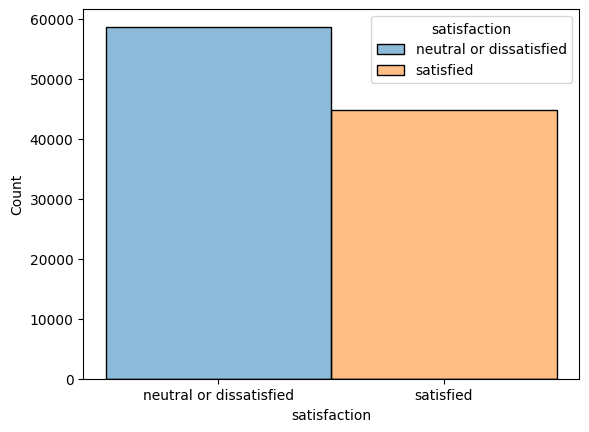

In [59]:
# visualize the distribution of the target column
sns.histplot(data=train_df, x="satisfaction", hue="satisfaction")  # , palette="viridis", multiple="stack")
plt.show()

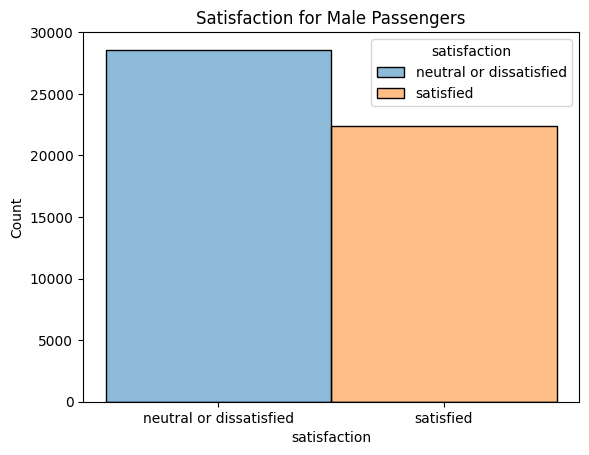

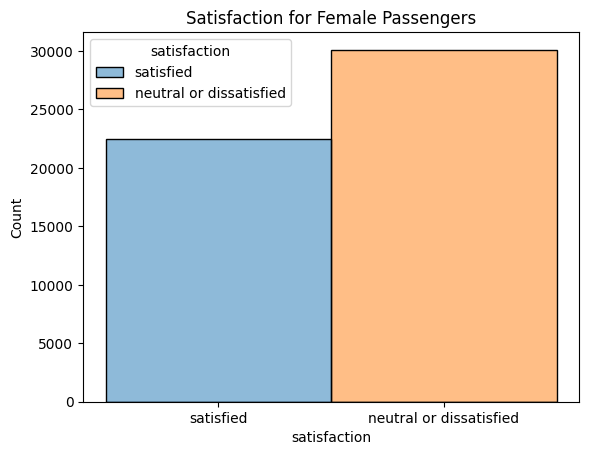

In [60]:
# visulize the relationship between the target column and the other columns
# satisfaction vs gender
# sns.histplot(train_df["gender"], hue=train_df["satisfaction"])
sns.histplot(data=train_df.loc[train_df["gender"] == "Male"], x="satisfaction", hue="satisfaction")
plt.title("Satisfaction for Male Passengers")
plt.show()
sns.histplot(data=train_df.loc[train_df["gender"] == "Female"], x="satisfaction", hue="satisfaction")
plt.title("Satisfaction for Female Passengers")
plt.show()

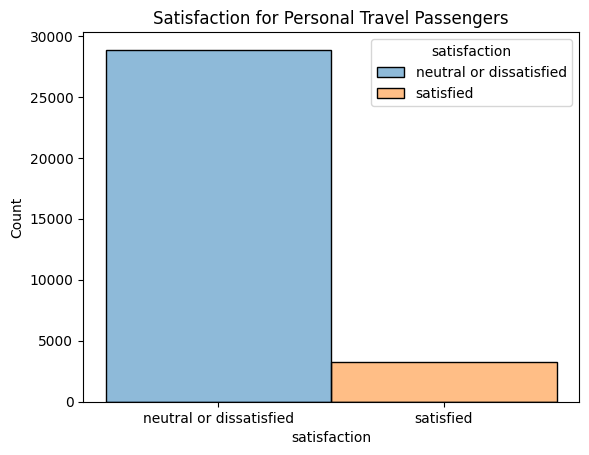

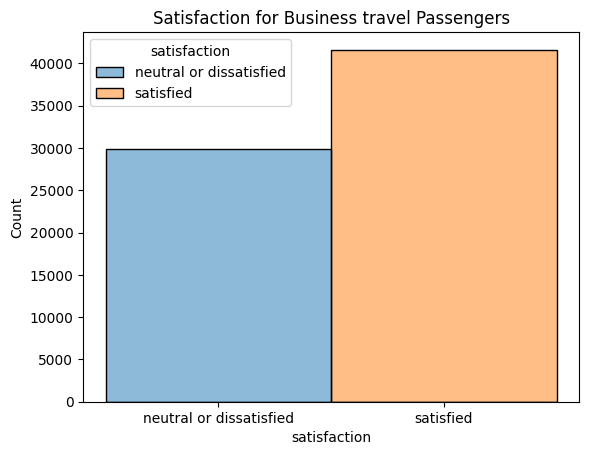

In [61]:
# satisfaction vs type of travel
for travel_type in train_df["type_of_travel"].unique():
    sns.histplot(data=train_df.loc[train_df["type_of_travel"] == travel_type], x="satisfaction", hue="satisfaction")
    plt.title(f"Satisfaction for {travel_type} Passengers")
    plt.show()

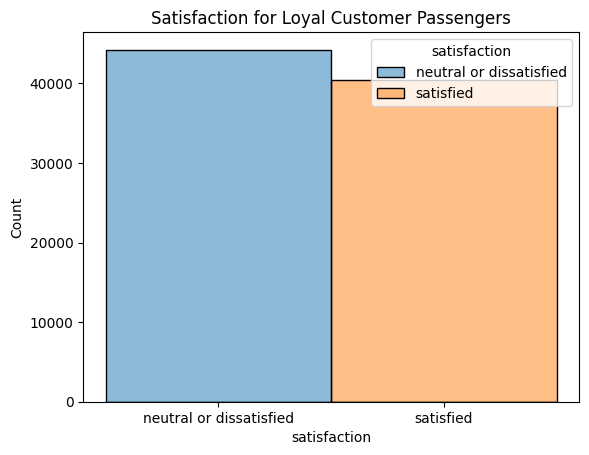

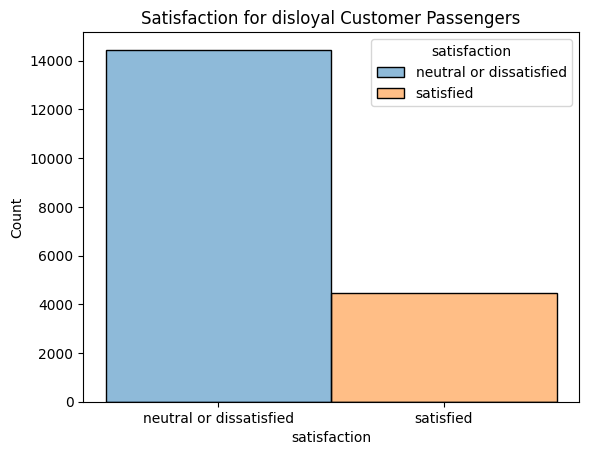

In [62]:
# satisfaction vs customer type
for customer_type in train_df["customer_type"].unique():
    sns.histplot(data=train_df.loc[train_df["customer_type"] == customer_type], x="satisfaction", hue="satisfaction")
    plt.title(f"Satisfaction for {customer_type} Passengers")
    plt.show()

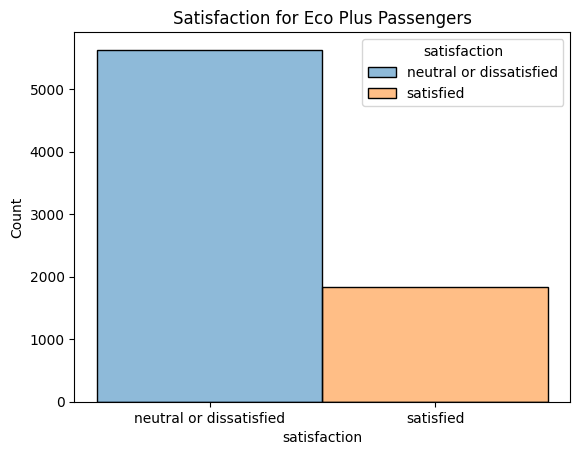

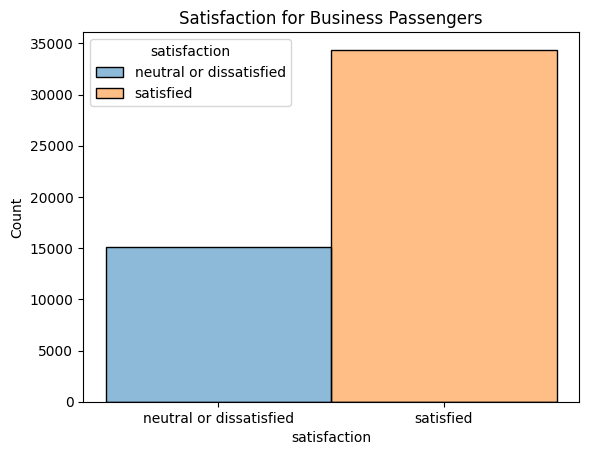

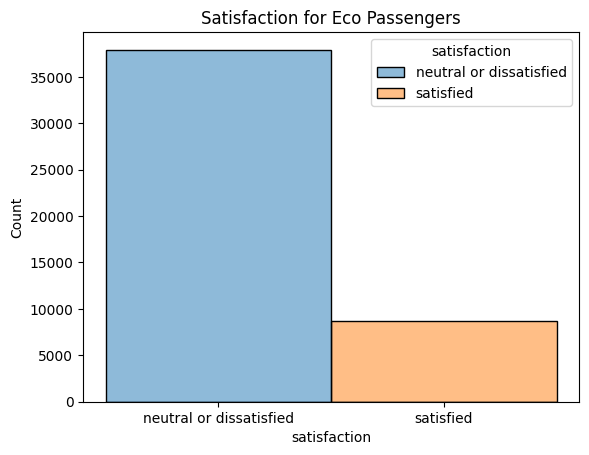

In [63]:
# satisfaction vs class
for class_ in train_df["class"].unique():
    sns.histplot(data=train_df.loc[train_df["class"] == class_], x="satisfaction", hue="satisfaction")
    plt.title(f"Satisfaction for {class_} Passengers")
    plt.show()

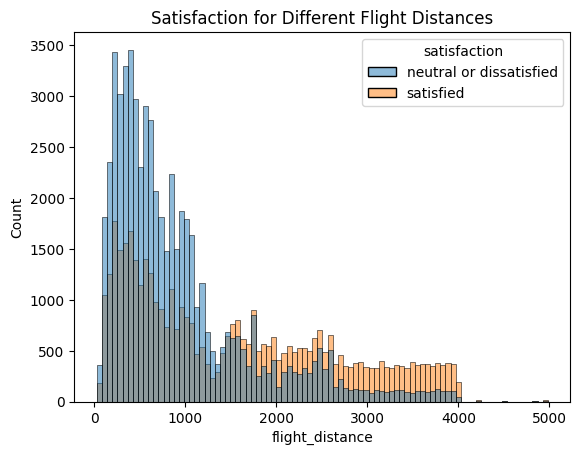

In [64]:
# satisfaction vs flight distance
sns.histplot(data=train_df, x="flight_distance", hue="satisfaction")
plt.title("Satisfaction for Different Flight Distances")
plt.show()

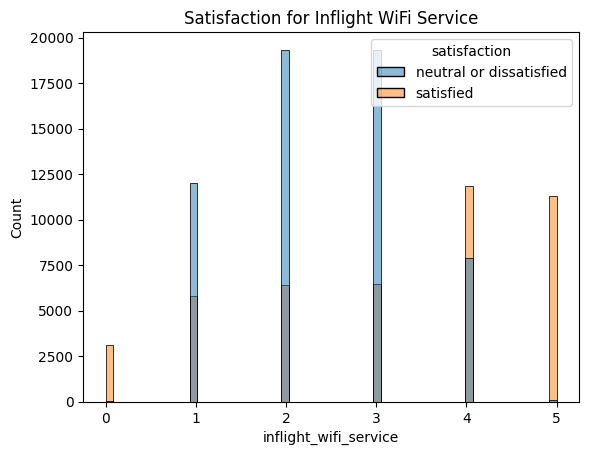

In [65]:
# satisfaction vs inflight wifi service
sns.histplot(data=train_df, x="inflight_wifi_service", hue="satisfaction")
plt.title("Satisfaction for Inflight WiFi Service")
plt.show()

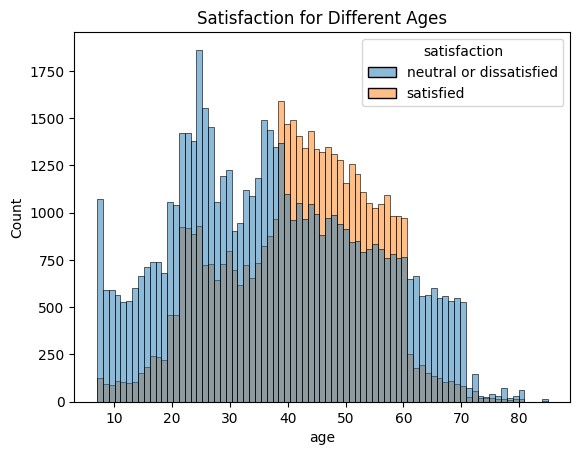

In [66]:
# satisfaction vs age
sns.histplot(data=train_df, x="age", hue="satisfaction")
plt.title("Satisfaction for Different Ages")
plt.show()

In [67]:
# encode the target column
train_df["satisfaction"] = train_df["satisfaction"].map({"neutral or dissatisfied": 0, "satisfied": 1})
test_df["satisfaction"] = test_df["satisfaction"].map({"neutral or dissatisfied": 0, "satisfied": 1})
# encode the categorical columns if the type is object
for column in train_df.columns:
    if train_df[column].dtype == "object":
        train_df[column] = train_df[column].astype("category").cat.codes
        test_df[column] = test_df[column].astype("category").cat.codes

In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103574 entries, 0 to 103573
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             103574 non-null  int8   
 1   customer_type                      103574 non-null  int8   
 2   age                                103574 non-null  float64
 3   type_of_travel                     103574 non-null  int8   
 4   class                              103574 non-null  int8   
 5   flight_distance                    103574 non-null  int64  
 6   inflight_wifi_service              103574 non-null  int64  
 7   departure/arrival_time_convenient  103574 non-null  int64  
 8   ease_of_online_booking             103574 non-null  int64  
 9   gate_location                      103574 non-null  int64  
 10  food_and_drink                     103574 non-null  int64  
 11  online_boarding                    1035

In [69]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25893 entries, 0 to 25892
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             25893 non-null  int8   
 1   customer_type                      25893 non-null  int8   
 2   age                                25893 non-null  int64  
 3   type_of_travel                     25893 non-null  int8   
 4   class                              25893 non-null  int8   
 5   flight_distance                    25893 non-null  int64  
 6   inflight_wifi_service              25893 non-null  int64  
 7   departure/arrival_time_convenient  25893 non-null  int64  
 8   ease_of_online_booking             25893 non-null  int64  
 9   gate_location                      25893 non-null  int64  
 10  food_and_drink                     25893 non-null  int64  
 11  online_boarding                    25893 non-null  int

In [70]:
# save the encoded datasets
train_df.to_csv("train_encoded.csv", index=False)
test_df.to_csv("test_encoded.csv", index=False)

4️⃣ **Feature Engineering**

In [71]:
# load the encoded datasets
train_df = pd.read_csv("train_encoded.csv")
test_df = pd.read_csv("test_encoded.csv")

In [72]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103574 entries, 0 to 103573
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             103574 non-null  int64  
 1   customer_type                      103574 non-null  int64  
 2   age                                103574 non-null  float64
 3   type_of_travel                     103574 non-null  int64  
 4   class                              103574 non-null  int64  
 5   flight_distance                    103574 non-null  int64  
 6   inflight_wifi_service              103574 non-null  int64  
 7   departure/arrival_time_convenient  103574 non-null  int64  
 8   ease_of_online_booking             103574 non-null  int64  
 9   gate_location                      103574 non-null  int64  
 10  food_and_drink                     103574 non-null  int64  
 11  online_boarding                    1035

In [73]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25893 entries, 0 to 25892
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             25893 non-null  int64  
 1   customer_type                      25893 non-null  int64  
 2   age                                25893 non-null  int64  
 3   type_of_travel                     25893 non-null  int64  
 4   class                              25893 non-null  int64  
 5   flight_distance                    25893 non-null  int64  
 6   inflight_wifi_service              25893 non-null  int64  
 7   departure/arrival_time_convenient  25893 non-null  int64  
 8   ease_of_online_booking             25893 non-null  int64  
 9   gate_location                      25893 non-null  int64  
 10  food_and_drink                     25893 non-null  int64  
 11  online_boarding                    25893 non-null  int

In [74]:
# outlier detection using quantiles
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

gender                                  1.0
customer_type                           0.0
age                                    24.0
type_of_travel                          1.0
class                                   1.0
flight_distance                      1328.0
inflight_wifi_service                   2.0
departure/arrival_time_convenient       2.0
ease_of_online_booking                  2.0
gate_location                           2.0
food_and_drink                          2.0
online_boarding                         2.0
seat_comfort                            3.0
inflight_entertainment                  2.0
on-board_service                        2.0
leg_room_service                        2.0
baggage_handling                        2.0
checkin_service                         1.0
inflight_service                        2.0
cleanliness                             2.0
departure_delay_in_minutes             12.0
arrival_delay_in_minutes               13.0
satisfaction                    

In [75]:
# remove outliers
train_df = train_df[~((train_df < (Q1 - 1.5 * IQR)) | (train_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [76]:
train_df.shape

(61012, 23)

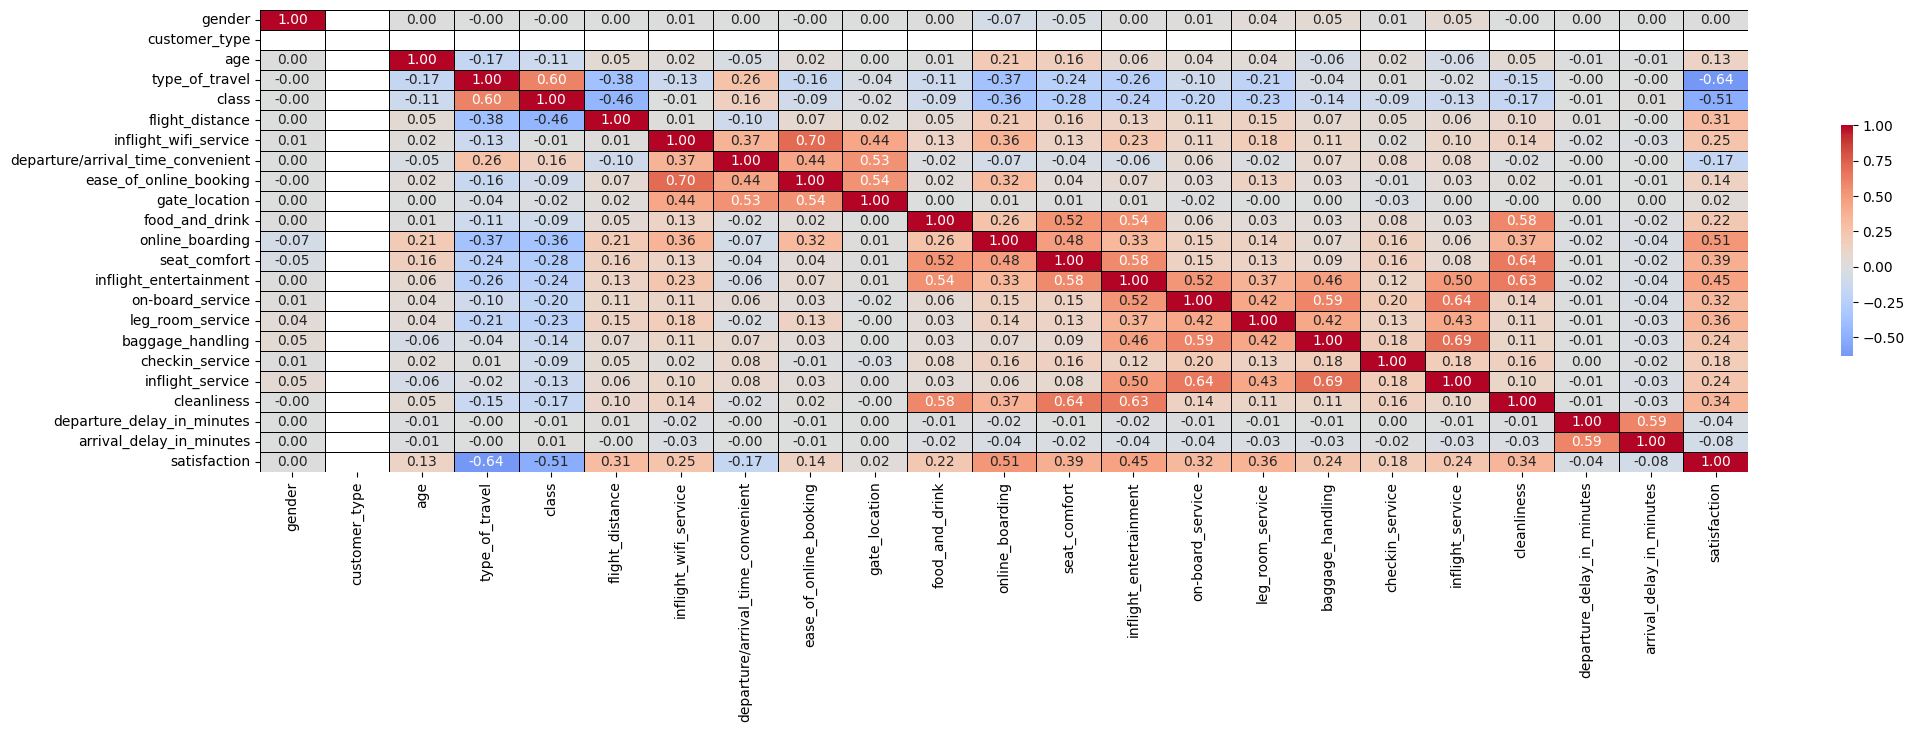

In [77]:
# correlation matrix
corr = train_df.corr()
plt.figure(figsize=(24, 6))
# mask = np.triu(np.ones_like(corr, dtype=bool))
# sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor="black", cbar_kws={"shrink": 0.5}, center=0)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor="black", cbar_kws={"shrink": 0.5}, center=0)
# fix the size of the heatmap
plt.show()

In [78]:
# select top 10 features with the highest correlation with the target column
top_features = corr["satisfaction"].sort_values(ascending=False).head(11)
print(top_features)

satisfaction              1.000000
online_boarding           0.512424
inflight_entertainment    0.453802
seat_comfort              0.392911
leg_room_service          0.357192
cleanliness               0.342805
on-board_service          0.323604
flight_distance           0.305441
inflight_wifi_service     0.254652
baggage_handling          0.242623
inflight_service          0.235977
Name: satisfaction, dtype: float64


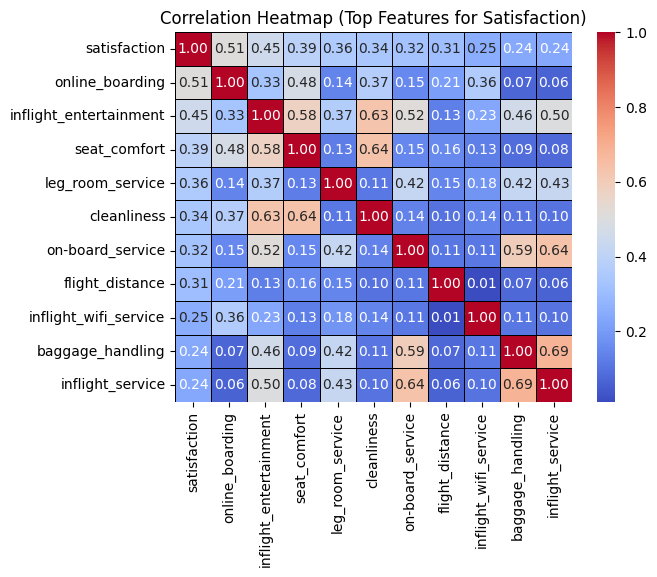

In [79]:
# Select top features related to 'satisfaction'
top_features = corr["satisfaction"].sort_values(ascending=False).head(11).index
subset_corr = corr.loc[top_features, top_features]

# Plot the heatmap for the subset
sns.heatmap(subset_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor="black")
plt.title("Correlation Heatmap (Top Features for Satisfaction)")
plt.show()

5️⃣ **Model Building**

In [80]:
# build the model using the top features
X_train = train_df[top_features].drop(columns=["satisfaction"])
y_train = train_df["satisfaction"]
X_test = test_df[top_features].drop(columns=["satisfaction"])
y_test = test_df["satisfaction"]

In [81]:
X_train.shape

(61012, 10)

In [82]:
X_test.shape

(25893, 10)

In [83]:
X_train.head()

,online_boarding,inflight_entertainment,seat_comfort,leg_room_service,cleanliness,on-board_service,flight_distance,inflight_wifi_service,baggage_handling,inflight_service
0,3,5,5.0,3,5,4,460,3,4,5
2,5,5,5.0,3,5,4,1142,2,4,4
4,5,3,5.0,4,3,3,214,3,4,3
5,2,1,1.0,4,1,3,1180,3,4,4
6,2,2,2.0,3,2,3,1276,2,4,5


In [84]:
y_train.head()

0    0
2    1
4    1
5    0
6    0
Name: satisfaction, dtype: int64

Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.83      0.82      0.83     14528
           1       0.78      0.79      0.78     11365

    accuracy                           0.81     25893
   macro avg       0.81      0.81      0.81     25893
weighted avg       0.81      0.81      0.81     25893

[[11985  2543]
 [ 2428  8937]]


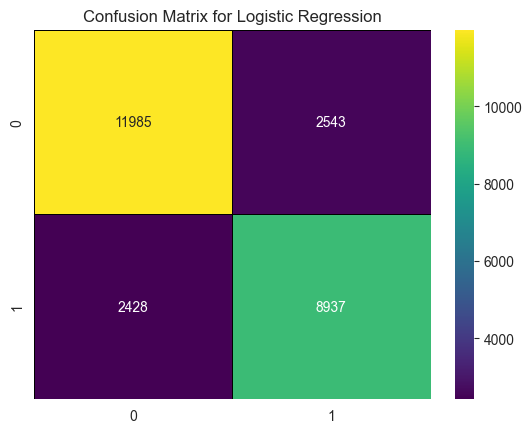

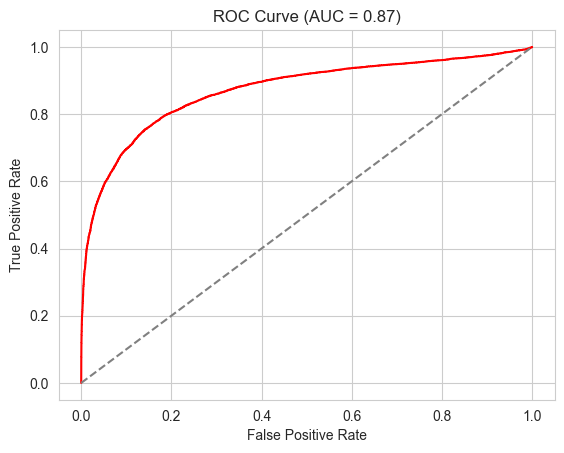

In [44]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="viridis", fmt="d", linewidths=0.5, linecolor="black")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()
# plot the ROC curve
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
plt.show()



Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     14528
           1       0.87      0.88      0.88     11365

    accuracy                           0.89     25893
   macro avg       0.89      0.89      0.89     25893
weighted avg       0.89      0.89      0.89     25893

[[13010  1518]
 [ 1333 10032]]


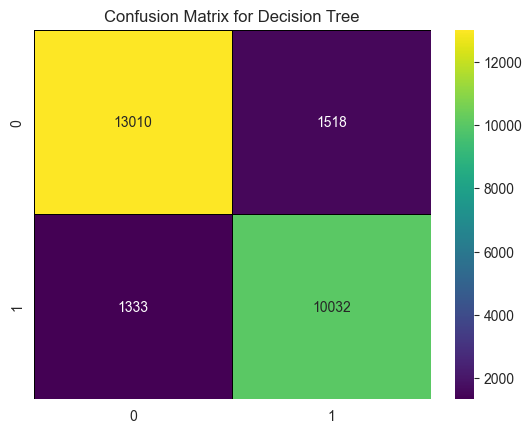

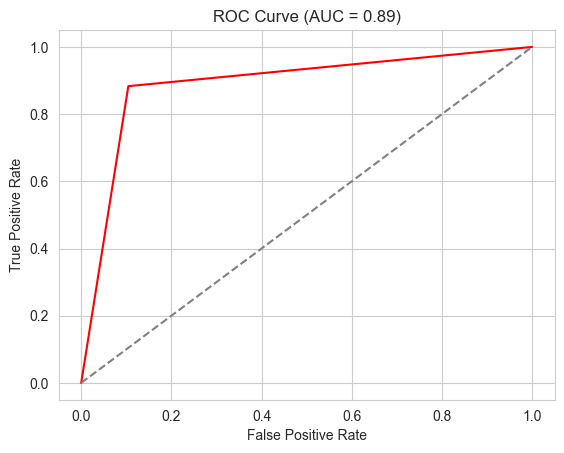

In [46]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="viridis", fmt="d", linewidths=0.5, linecolor="black")
plt.title("Confusion Matrix for Decision Tree")
plt.show()
# plot the ROC curve
y_pred_proba = dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
plt.show()


Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     14528
           1       0.91      0.89      0.90     11365

    accuracy                           0.92     25893
   macro avg       0.92      0.91      0.91     25893
weighted avg       0.92      0.92      0.92     25893

[[13554   974]
 [ 1202 10163]]


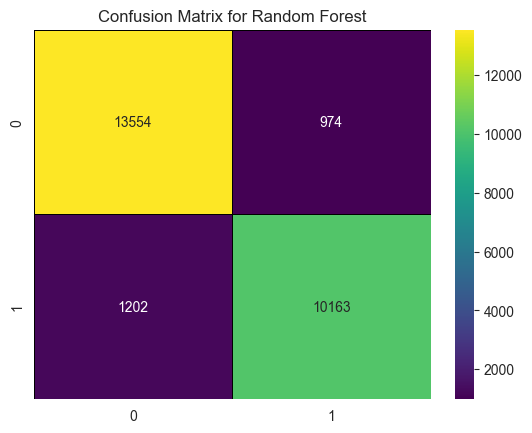

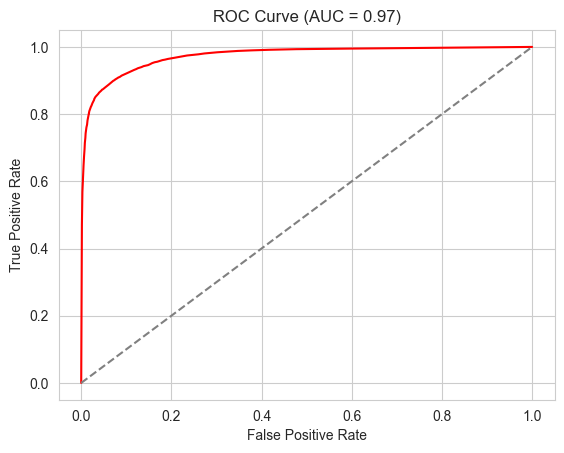

In [47]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="viridis", fmt="d", linewidths=0.5, linecolor="black")
plt.title("Confusion Matrix for Random Forest")
plt.show()
# plot the ROC curve
y_pred_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
plt.show()


Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     14528
           1       0.89      0.88      0.88     11365

    accuracy                           0.90     25893
   macro avg       0.90      0.89      0.89     25893
weighted avg       0.90      0.90      0.90     25893

[[13251  1277]
 [ 1408  9957]]


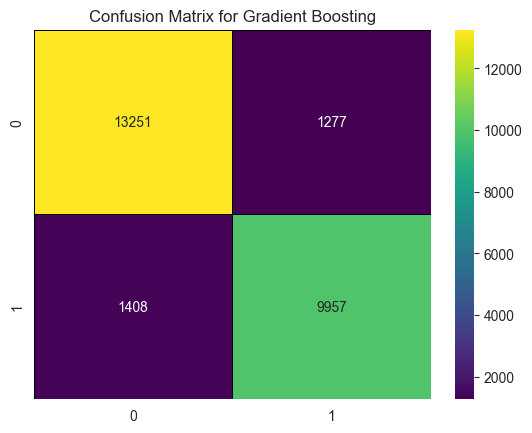

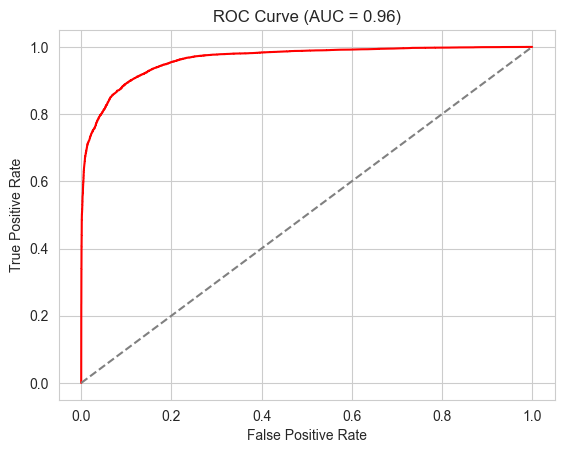

In [48]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="viridis", fmt="d", linewidths=0.5, linecolor="black")
plt.title("Confusion Matrix for Gradient Boosting")
plt.show()
# plot the ROC curve
y_pred_proba = gb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
plt.show()

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     14528
           1       0.92      0.89      0.91     11365

    accuracy                           0.92     25893
   macro avg       0.92      0.92      0.92     25893
weighted avg       0.92      0.92      0.92     25893

[[13638   890]
 [ 1213 10152]]


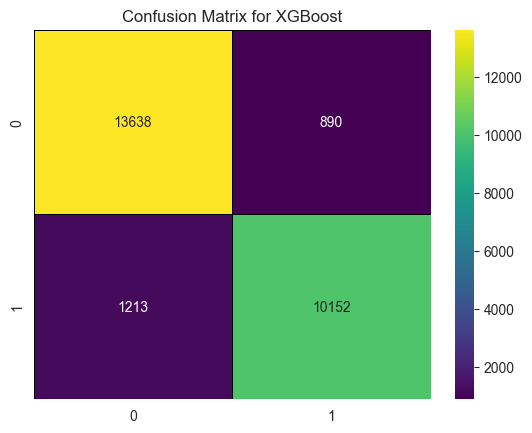

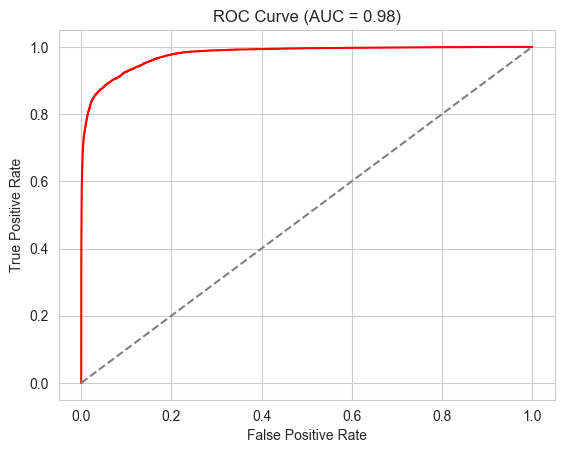

In [49]:
# XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="viridis", fmt="d", linewidths=0.5, linecolor="black")
plt.title("Confusion Matrix for XGBoost")
plt.show()
# plot the ROC curve
y_pred_proba = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
plt.show()

[LightGBM] [Info] Number of positive: 31115, number of negative: 29900
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 61015, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509957 -> initscore=0.039832
[LightGBM] [Info] Start training from score 0.039832
Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     14528
           1       0.92      0.89      0.90     11365

    accuracy                           0.92     25893
   macro avg       0.92      0.91      0.92     25893
weighted avg       0.92      0.92      0.92     25893

[[13621   907]
 [ 1252 10113]]


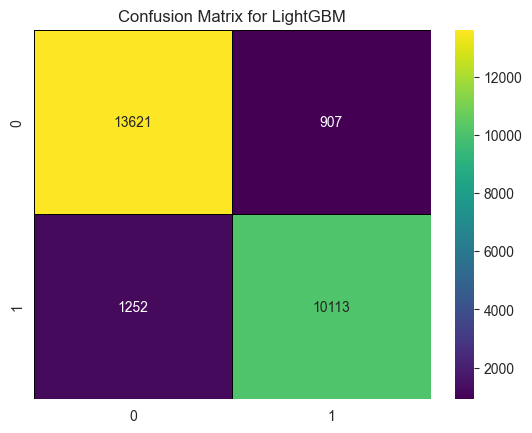

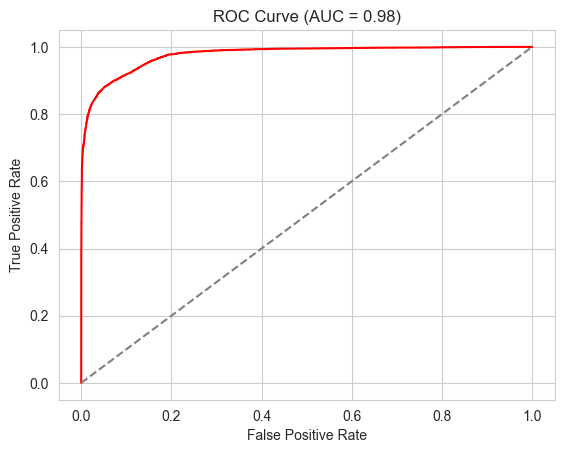

In [50]:
# LightGBM
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="viridis", fmt="d", linewidths=0.5, linecolor="black")
plt.title("Confusion Matrix for LightGBM")
plt.show()
# plot the ROC curve
y_pred_proba = lgbm.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
plt.show()


Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     14528
           1       0.92      0.90      0.91     11365

    accuracy                           0.92     25893
   macro avg       0.92      0.92      0.92     25893
weighted avg       0.92      0.92      0.92     25893

[[13683   845]
 [ 1191 10174]]


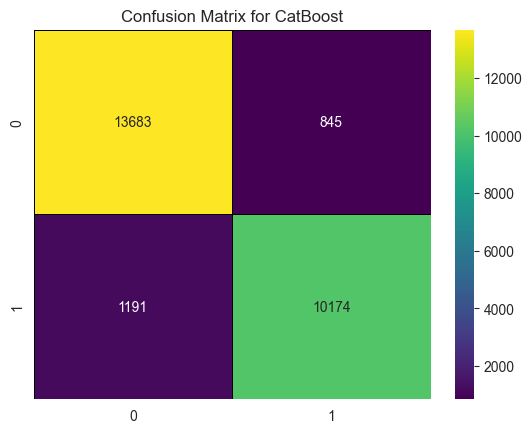

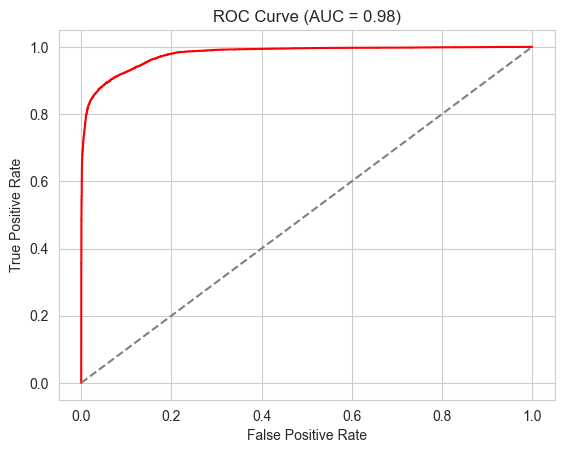

In [51]:
# CatBoost
from catboost import CatBoostClassifier

cb = CatBoostClassifier(verbose=0)
cb.fit(X_train, y_train)
y_pred = cb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="viridis", fmt="d", linewidths=0.5, linecolor="black")
plt.title("Confusion Matrix for CatBoost")
plt.show()
# plot the ROC curve
y_pred_proba = cb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
plt.show()

In [52]:
# save the models
import joblib

joblib.dump(log_reg, "log_reg_model.pkl")
joblib.dump(dt, "dt_model.pkl")
joblib.dump(rf, "rf_model.pkl")
joblib.dump(gb, "gb_model.pkl")
joblib.dump(xgb, "xgb_model.pkl")
joblib.dump(lgbm, "lgbm_model.pkl")
joblib.dump(cb, "cb_model.pkl")


['cb_model.pkl']

6️⃣ **Model Evaluation**

In [53]:
# load the models
log_reg = joblib.load("log_reg_model.pkl")
dt = joblib.load("dt_model.pkl")
rf = joblib.load("rf_model.pkl")
gb = joblib.load("gb_model.pkl")
xgb = joblib.load("xgb_model.pkl")
lgbm = joblib.load("lgbm_model.pkl")
cb = joblib.load("cb_model.pkl")

In [54]:
# predict with the models
y_pred_log_reg = log_reg.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_lgbm = lgbm.predict(X_test)
y_pred_cb = cb.predict(X_test)


In [55]:
# evaluate the models
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
accuracy_cb = accuracy_score(y_test, y_pred_cb)


In [56]:
print(f"Accuracy for Logistic Regression: {accuracy_log_reg:.2f}")
print(f"Accuracy for Decision Tree: {accuracy_dt:.2f}")
print(f"Accuracy for Random Forest: {accuracy_rf:.2f}")
print(f"Accuracy for Gradient Boosting: {accuracy_gb:.2f}")
print(f"Accuracy for XGBoost: {accuracy_xgb:.2f}")
print(f"Accuracy for LightGBM: {accuracy_lgbm:.2f}")
print(f"Accuracy for CatBoost: {accuracy_cb:.2f}")


Accuracy for Logistic Regression: 0.81
Accuracy for Decision Tree: 0.89
Accuracy for Random Forest: 0.92
Accuracy for Gradient Boosting: 0.90
Accuracy for XGBoost: 0.92
Accuracy for LightGBM: 0.92
Accuracy for CatBoost: 0.92


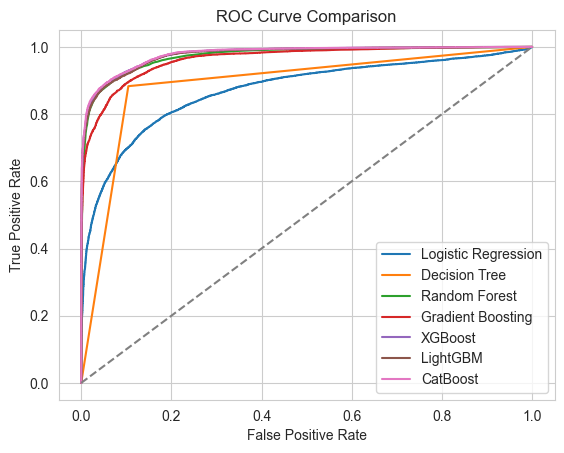

In [57]:
# compare the ROC curves
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
y_pred_proba_gb = gb.predict_proba(X_test)[:, 1]
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]
y_pred_proba_lgbm = lgbm.predict_proba(X_test)[:, 1]
y_pred_proba_cb = cb.predict_proba(X_test)[:, 1]

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_proba_log_reg)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_pred_proba_lgbm)
fpr_cb, tpr_cb, _ = roc_curve(y_test, y_pred_proba_cb)

plt.plot(fpr_log_reg, tpr_log_reg, label="Logistic Regression")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot(fpr_gb, tpr_gb, label="Gradient Boosting")
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost")
plt.plot(fpr_lgbm, tpr_lgbm, label="LightGBM")
plt.plot(fpr_cb, tpr_cb, label="CatBoost")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()